## TF描述卷积层

tf.keras.layers.Conv2D(
<p>filters=卷积核个数，
<p>kernel_size=卷积核尺寸，正方形写核长，或（核高，核宽）
<p>strides=滑动步长，或（纵向步长，横向步长）,默认1
<p>padding='same'（使用）or'valid'（默认不使用）使用全零填充
<p>activation='relu'or'sigmoid'or'tanh'or'softmax'这一层卷积后还有批标准化操作，不激活
<p>input_shape=(高，宽，通道数)可省略
<p>)

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

model=tf.keras.models.Sequential([
    Conv2D(6,5,padding='valid',activation='sigmoid'),
    MaxPool2D(2,2),
    Conv2D(6,(5,5),padding='valid',activation='sigmoid'),
    MaxPool2D(2,(2,2)),
    Conv2D(filters=6,kernel_size=(5,5),padding='valid',activation='sigmoid'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),#三层卷积层在说同一个东西
    Dense(10,activation='softmax')
])

## 批标准化

随着网络层数的增加，特征数据会出现偏移零均值的情况，标准化可以使数据符合$\mathcal{N}(0,1)$批标准化是对一个batch的数据进行标准化操作，在<mark>卷积操作和激活操作之间</mark>
$$
H_i^{'k}=\frac{H^k_i-\mu_{batch}^k}{\sigma_{batch}^k}
$$
- $H_i^K$批标准化前，第k个卷积核，输出特征图中第i个像素点
- $\mu_{batch}^k$批标准化前，第k个卷积核，batch张输出特征图中所有像素点平均值
- $\sigma_{batch}^k$批标准化前，第k个卷积核，batch张输出特征图中所有像素点标准差
$$
\mu_{batch}^k=\frac{1}{m}\sum_{i=1}^m H_i^k\qquad\sigma_{batch}^k=\sqrt{\delta+\frac{1}{m}\sum_{i=1}^m(H_i^k-\mu_{batch}^k)^2}
$$

BN操作拉回到激活函数的零均值区域，提升了激活函数对输入数据的区分力，但使激活函数丧失了非线性特性
$$
X_i^k=\gamma_kH_i^{'k}+\beta_k
$$
其中$\gamma_k$是缩放因子，$\beta_k$是偏移因子

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,BatchNormalization,Activation,Dropout

model=tf.keras.models.Sequential([
    Conv2D(filters=6,kernel_size=(5,5),padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
    Dropout(0.2)
])

## 池化

池化用于减少特征数据量，最大值池化可提取图片纹理，均值池化可保留背景特征，提取池化核覆盖部分的均值或者最大值

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,BatchNormalization,Activation,MaxPool2D,Dropout,AveragePooling2D

model=tf.keras.models.Sequential([
    Conv2D(filters=6,kernel_size=(5,5),padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2),#池化核大小
    strides=2,#池化步长
    padding='same'),#使用全零填充，不适用是‘valid’
    Dropout(0.2),
])

## 舍弃

在神经网络训练时，将一部分神经元按照一定概率从神经网络暂时舍弃，使用时恢复链接，tf.keras.layers.Dropout(舍弃的概率)从而缓解过拟合

## 卷积神经网络

- 卷积
- 批标准化
- 激活
- 池化
- 全连接网络

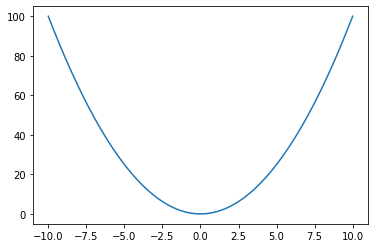

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a=np.linspace(-10,10,1000)
b=a**2
plt.plot(a,b)